# Decision Tree Classification

## Importing the libraries

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree   
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [36]:
Women = pd.read_excel('WomenDP.xlsx')
print(type(Women))
print(Women)

<class 'pandas.core.frame.DataFrame'>
    Unnamed: 0 LFDeficient  Wbindex  LifeExpect     LfPart            Dpreg
0          AFG         Yes   38.125      66.677  21.566000  Least Developed
1          ALB          No   91.250      81.666  52.723000   More Developed
2          DZA          No   57.500      77.760  16.600000   Less Developed
3          AGO          No   73.125      64.922  75.011002  Least Developed
4          ARG          No   76.250      80.681  50.167999   Less Developed
..         ...         ...      ...         ...        ...              ...
171        VEN          No   85.000      76.566  36.167000   Less Developed
172        VNM          No   78.750      78.888  70.332001   Less Developed
173        YEM         Yes   26.875      68.627   6.138000  Least Developed
174        ZMB          No   81.250      65.409  69.906998  Least Developed
175        ZWE         Yes   86.875      63.661  80.338997   Less Developed

[176 rows x 6 columns]


## Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
Women.columns

Index(['Unnamed: 0', 'LFDeficient', 'Wbindex', 'LifeExpect', 'LfPart',
       'Dpreg'],
      dtype='object')

In [39]:
x=Women.loc[:,['LFDeficient', 'Wbindex', 'LifeExpect', 'LfPart']]
x['LFDeficient']=pd.Categorical(Women['LFDeficient']).codes
y=Women.loc[:,['Dpreg']]

In [40]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [41]:
x_train

,LFDeficient,Wbindex,LifeExpect,LfPart
11,1,49.375,75.090,36.311001
131,0,83.750,77.058,65.079002
61,1,75.000,66.825,65.278999
78,0,68.125,73.874,58.438999
32,0,77.500,82.711,49.487000
...,...,...,...,...
120,0,94.375,76.441,60.084999
106,0,58.750,69.799,45.631001
140,0,94.375,81.200,52.314999
96,0,73.750,81.162,35.333000


In [42]:
x_test

,LFDeficient,Wbindex,LifeExpect,LfPart
87,0,52.500,81.043,21.885000
148,0,26.250,77.338,18.077999
144,0,88.125,69.107,48.452999
119,1,60.000,68.671,46.870998
7,0,94.375,84.200,55.978001
149,1,29.375,68.388,29.549000
46,0,89.375,79.953,54.393002
109,0,97.500,83.700,59.799999
42,1,78.750,62.243,62.563000
49,0,51.875,63.540,51.250999


## Feature Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [ ]:
#print(x_train)

In [ ]:
#print(x_test)

## Training the Decision Tree Classification model on the Training set

In [44]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=1)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

## Predicting the Test set results

In [45]:
y_pred = classifier.predict(x_test)
print('The accuracy of the Decision Tree is','{:.3f}'.format(100*metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Decision Tree is 80.556


In [46]:
Women.groupby('Dpreg').all()

,Unnamed: 0,LFDeficient,Wbindex,LifeExpect,LfPart
Dpreg,,,,,
Least Developed,True,True,True,True,True
Less Developed,True,True,True,True,True
More Developed,True,True,True,True,True


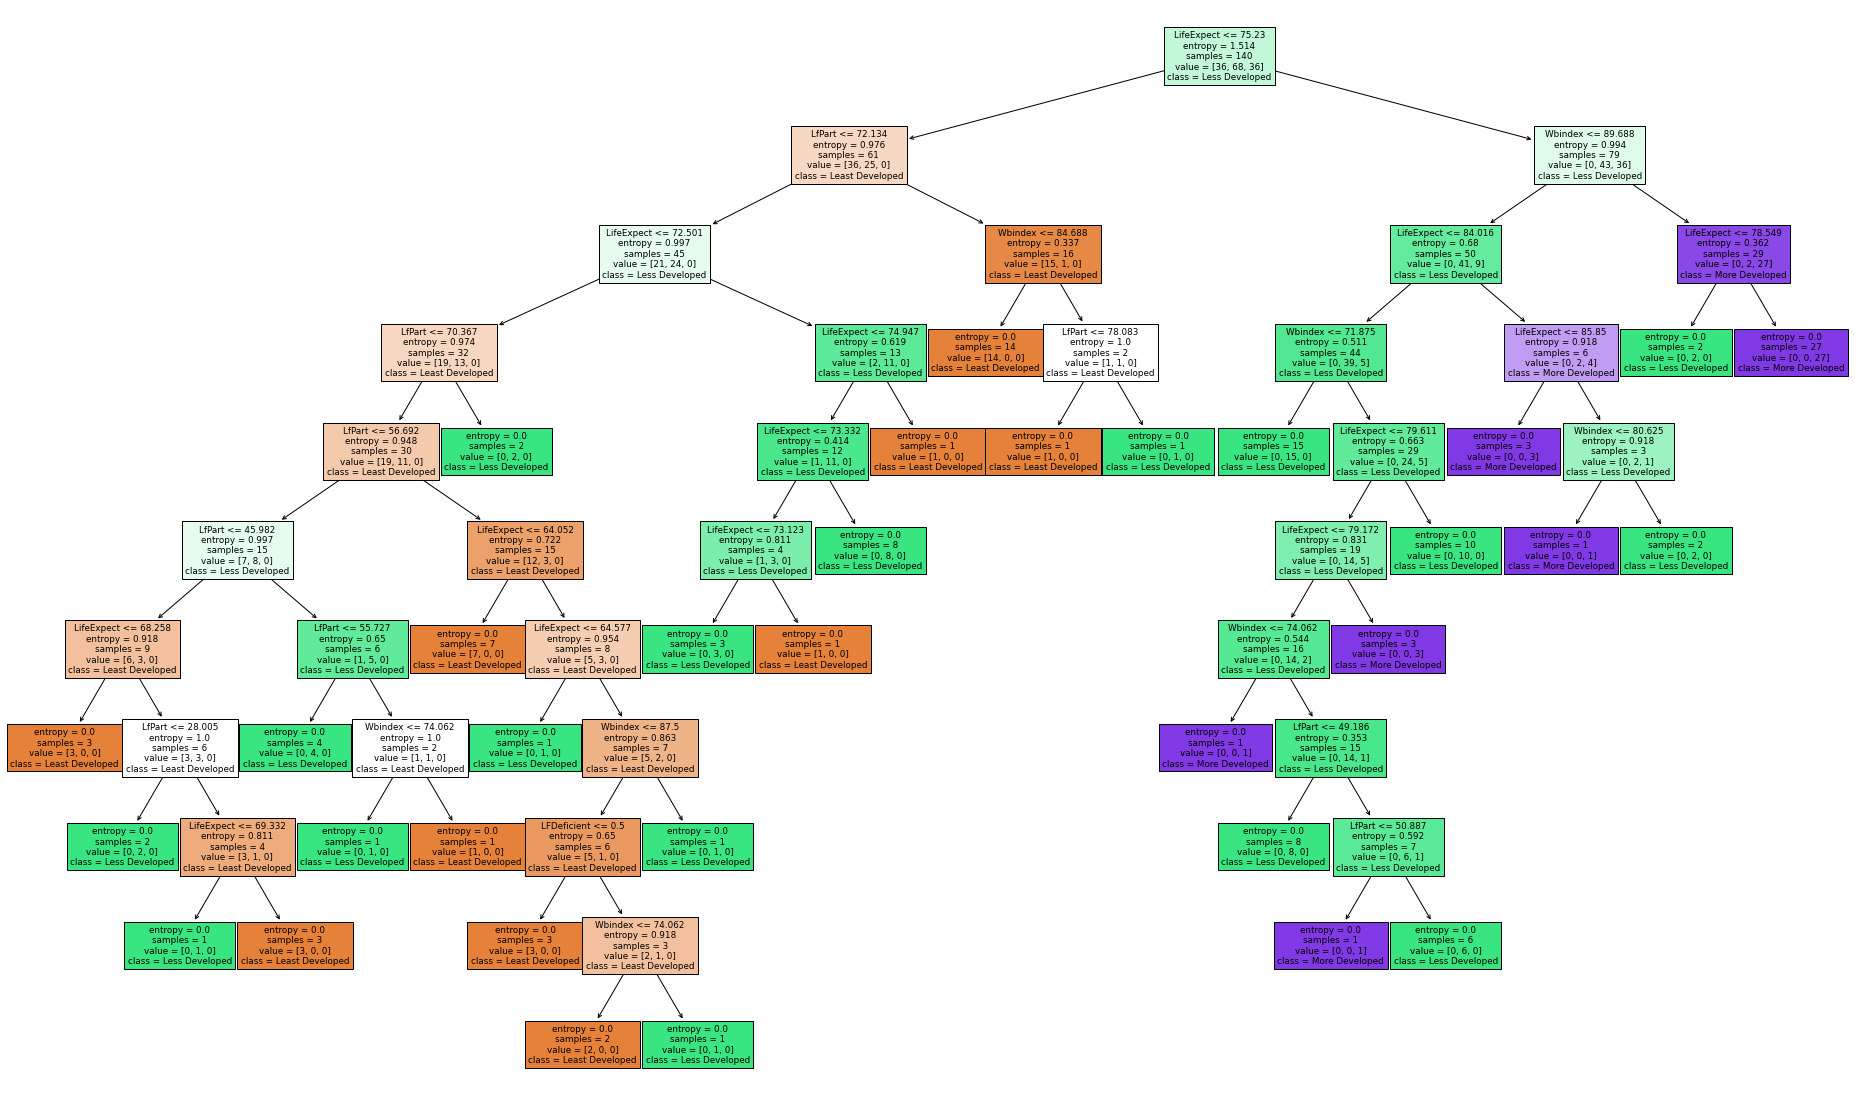

In [52]:
plt.figure(figsize = (33,20))
plot_tree(classifier,    proportion=False, feature_names = x.columns,class_names = ['Least Developed','Less Developed','More Developed'], filled = True,max_depth=10);

## Predicting a new result

In [50]:
#print(classifier.predict(x_test))
print(classifier.predict([[1, 29.375, 68.388, 29.549000]]))

['Less Developed']


C:\Users\Naghme.dashti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
